In [806]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [807]:
df=pd.read_csv('F:\Employee-Attrition-Prediction\data\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [808]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [809]:
df.shape

(1470, 35)

>the dataset contain 1470 rows and 35 columns

In [810]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [811]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [812]:
df.isna().value_counts()

Age    Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
False  False      False           False      False       False             False      False           False          False           False                    False   False       False           False     False    False            False          False          False        False               False   False     False              False              False                     False          False             False              False                  F

>thier are no null values in the dataset

In [813]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


>there are 26 numerical columns

>there are no significant outliers in these columns 

In [814]:
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

> we can see 3 features have same values,so they can be dropped from dataframe

>and also Employee Number which is unique for every employee can be dropped

In [815]:
df.drop(columns=['Over18','StandardHours','EmployeeCount','EmployeeNumber'],axis=1,inplace=True)

In [816]:
df.duplicated().value_counts()

False    1470
Name: count, dtype: int64

>there are no duplicate rows

In [817]:
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})

In [818]:
df.select_dtypes(include='number').corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64

In [819]:
high_corr_coll=df.select_dtypes(include='number').corr()['Attrition']
high_corr_coll=high_corr_coll[abs(high_corr_coll)>0.1].index
high_corr_coll

Index(['Age', 'Attrition', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')

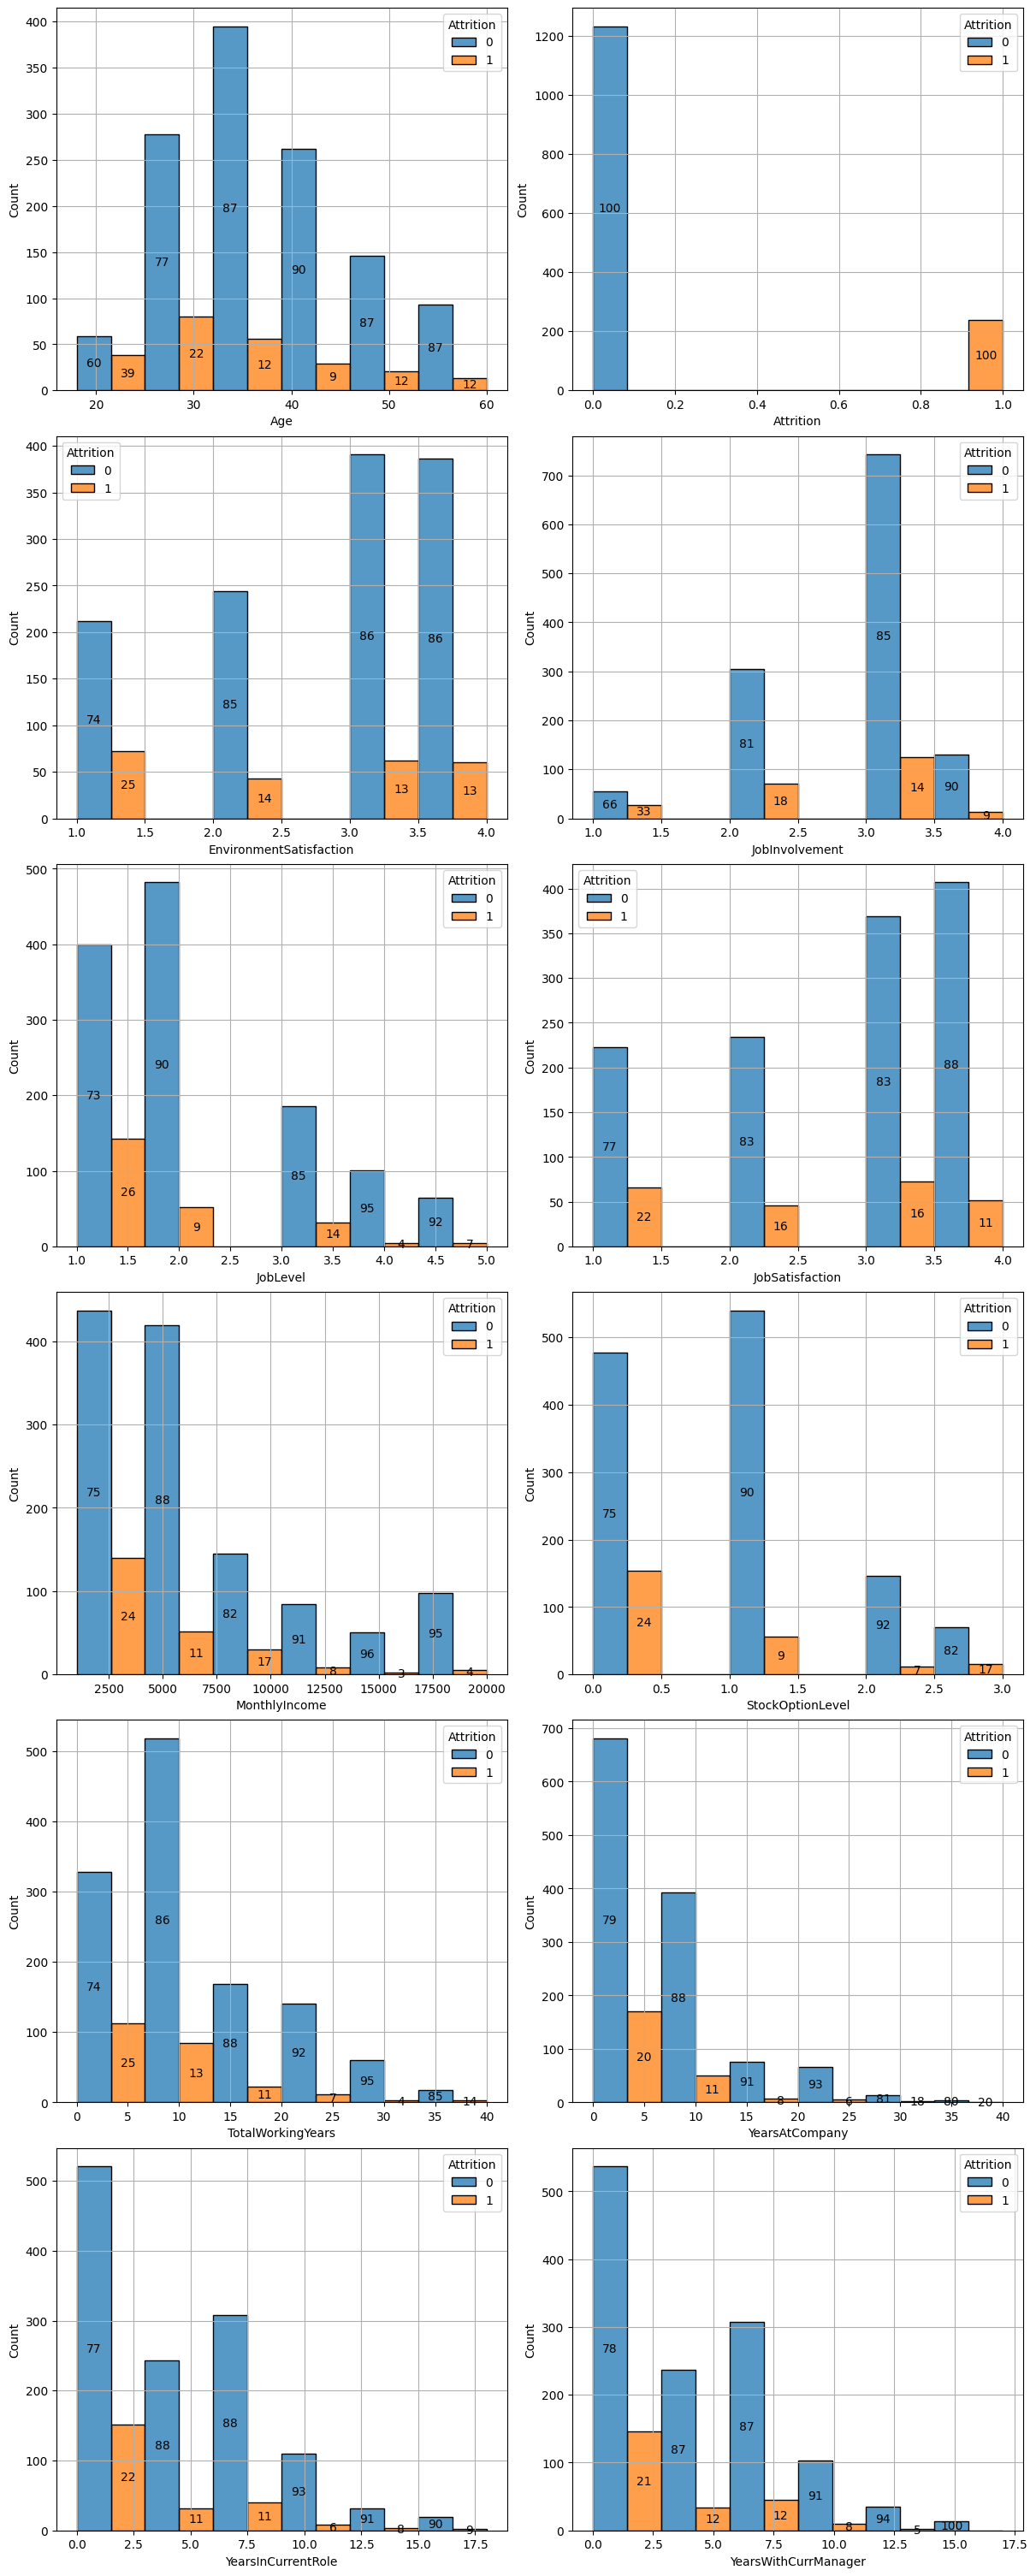

In [820]:
fig,axes=plt.subplots(int(len(high_corr_coll)/2),2,figsize=(12,30),constrained_layout=True)
for i,ax in enumerate(axes.flatten()):
    col=high_corr_coll[i]
    if (df[col].nunique()>6):
        bin=6
    sns.histplot(x=high_corr_coll[i],data=df,hue='Attrition',bins=bin,multiple='dodge',ax=ax)
    ax.grid()
    for i,p in enumerate(ax.patches):
        for j,q in enumerate(ax.patches):
            if (i+bin)==j:
                total=p.get_height()+q.get_height()
            elif (j+bin)==i:
                total=p.get_height()+q.get_height()
        height=p.get_height()
        if(height>0):
            ax.annotate(int((height/total)*100),((p.get_x()+p.get_width()/2),height/2),ha='center',va='center')
plt.show()

>25 % employee who expressed strong dissagreement(1) over environmentsatisfaction are likely to quit
rest are 13-11%

>42% and 22% Attrition rate is found in the employe who fall in age categ of <25 and 25-32 year old

>33% attrition rate for employee with poor JobInvolvement rating rest are 13-9%

>26% attrition rate with job level of 1 and <15% in rest level

>22% attrition rate with job satisfaction level of 1 and rest <16%

>24% of people who have monthlyincome <4200 are likely to attrition 17% for 7000-1000 and rest are less than 11

>24% of employee with stock optional level of 1 and 17% with level of 3 are likely attrition

>25% of employees who have less than 7 years of total working years are likely to attriation rest are <15%

>20% of employees who have less than 7 years at company are likely to attriation rest are <11%

>20% of employees who have less than 3 years at current likely to attriation rest are <11%

>21% employees who have less than 3 years with current manager are likely for attrition rest are <12%


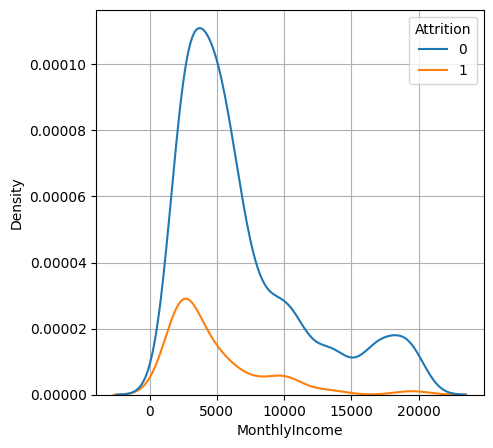

In [821]:
plt.figure(figsize=(5,5))
sns.kdeplot(x='MonthlyIncome',data=df,hue='Attrition')
plt.grid()
plt.show()

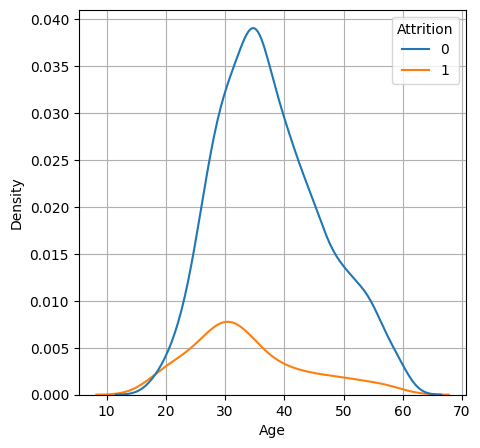

In [822]:
plt.figure(figsize=(5,5))
sns.kdeplot(x='Age',data=df,hue='Attrition')
plt.grid()
plt.show()

In [823]:
num_df=df.select_dtypes(include='number')

In [824]:
cat_df=df.select_dtypes(exclude='number')

In [825]:
cat_df.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

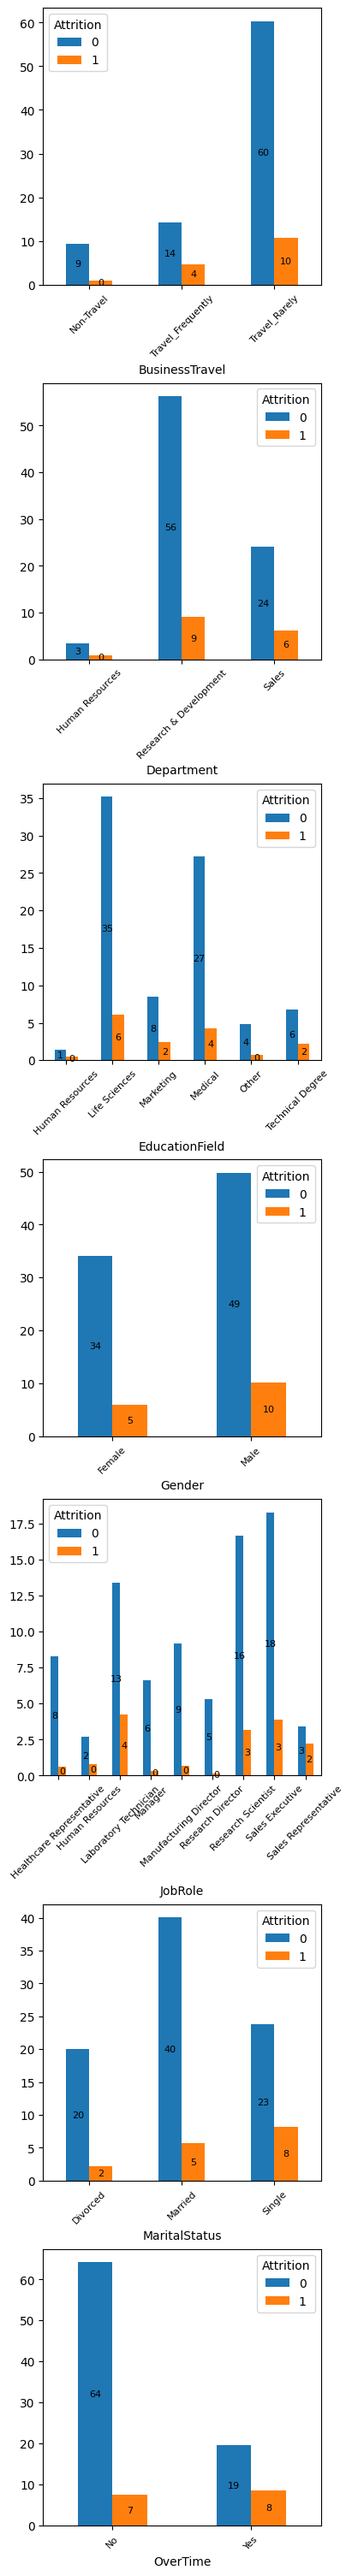

In [826]:
fig,axes=plt.subplots(7,1,figsize=(4,30),constrained_layout=True)
for i,ax in enumerate(axes.flatten()):
    ct=pd.crosstab(cat_df.iloc[:,i],df['Attrition'],normalize=True)*100
    ct.plot(kind='bar',stacked=False,ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=8,rotation=45)
    plt.grid()

    for j in ax.patches:
        height=j.get_height()
        y_pos=j.get_y()+height/2
        ax.annotate(int(height),(j.get_x()+j.get_width()/2,y_pos),ha='center',va='center',fontsize=8,color='black')
plt.grid()
plt.show()

> from these plots we can make few observations

>people who does over time are 30% attiration ratio

>people who are single have 25% attiration rate and aroun 10% for married or divorced

In [827]:
cat_col=df.select_dtypes(exclude='number').columns


In [828]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
o_e=OneHotEncoder(drop='first', handle_unknown='ignore')


c_t=ColumnTransformer(
    transformers=[('cat',o_e,cat_col)],
    remainder='passthrough'
)
encoded_array=(c_t.fit_transform(df))
df_encoded=pd.DataFrame(encoded_array,columns=c_t.get_feature_names_out())

In [829]:
len(df.select_dtypes(include='number').columns)

24

In [830]:
x=df_encoded.drop('remainder__Attrition',axis=1)
y=df_encoded['remainder__Attrition']

In [831]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

l_r=LogisticRegression(max_iter=5000)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=20)

In [832]:
predictor=l_r.fit(x_train,y_train)

In [833]:
y_pred=pd.DataFrame(predictor.predict(x_test))

In [834]:
compare=pd.DataFrame()
compare['y_pre']=y_pred
compare['y_test']=y_test.reset_index(drop=True)

In [835]:
print(predictor.n_iter_)

[4468]


In [836]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[238   5]
 [ 28  23]]


accuracy=(FN+FP)/total
precision=TP/(TP+FP)
recall=TP/(TP+FN)



In [837]:
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,precision_score,recall_score 

In [838]:
print('f1_score :',f1_score(y_test,y_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_pred))
print('accuracy_score :',accuracy_score(y_test,y_pred))
print('precision_score :',precision_score(y_test,y_pred))
print('recall_score :',recall_score(y_test,y_pred))


f1_score : 0.5822784810126583
roc_auc_score : 0.7152021302348098
accuracy_score : 0.8877551020408163
precision_score : 0.8214285714285714
recall_score : 0.45098039215686275
